# Using Variational Autoencoders for Fantasy Map Generation
### (Use Case/Industry --> Worldbuilding Tool for Writers) 

The [Earth Terrain, Height, and Segmentation Map Images Dataset](https://www.kaggle.com/tpapp157/earth-terrain-height-and-segmentation-map-images?select=0050_i2.png) was utilised for this assignment. 

A thorough description of the project is included as a PDF Report in this repository.

# Anti-Disconnect for Google Colab


In [ ]:
#https://colab.research.google.com/github/justinjohn0306/VQGAN-CLIP/blob/main/VQGAN%2BCLIP(Updated).ipynb#scrollTo=g7EDme5RYCrt

import IPython
js_code = '''
function ClickConnect(){
console.log("Working");
document.querySelector("colab-toolbar-button#connect").click()
}
setInterval(ClickConnect,60000)
'''
display(IPython.display.Javascript(js_code))


<IPython.core.display.Javascript object>

In [ ]:
#Getting python files from github
!git clone https://github.com/Louismac/colab_files
%cd /content/colab_files

# Loading the dataset


In [ ]:
# Image size
img_height = 128
img_width = 128
# Since working with RGB
channels = 3

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import os

In [ ]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Path to folder
path_to_images = '/content/drive/MyDrive/satellite'

In [ ]:
# Image extension
file_type = ".png"

In [ ]:
# Getting all paths
paths = []
for root, dirs, files in os.walk(path_to_images, topdown=False):
    for name in files:
        # Getting all the ".wav" files
        if file_type in name.lower():
            paths.append(str(os.path.join(root, name)))
# Loading in images
dataset = [np.array(img_to_array(load_img(i,target_size=((img_height,img_width)))))/255.0 for i in paths]
dataset = np.array(dataset).astype("float32")
dataset.shape

(15000, 128, 128, 3)

## Getting a subset to train on to save time

In [ ]:
dataset.shape

(15000, 128, 128, 3)

In [ ]:
limit = 12000
dataset = dataset[:limit]

## Training the model

In [ ]:
# https://git.arts.ac.uk/lmccallum/ai-for-media
from cci_autoencoders import init_VAE
from tensorflow import keras

In [ ]:
# Latent dimensions
image_dims = (img_width,img_height,channels)
latent_dim = 32

In [ ]:
# Building model 
vae = init_VAE(input_dims=image_dims, latent_dim = latent_dim)
vae.compile(optimizer=keras.optimizers.Adam())

In [ ]:
# Train
vae.fit(dataset, epochs=30)

### Loading and Saving models

In [ ]:
# Picking a path to save the model in
path = '/content/drive/MyDrive/' + "my_models"
!mkdir path

In [ ]:
# Saving the model
vae.encoder.save(path+'encoder.tf')
vae.decoder.save(path+'decoder.tf')

In [ ]:
from cci_autoencoders import load_from_file

In [ ]:
# Load model from folder
path = '/content/drive/MyDrive/' + "my_models"
vae = load_from_file(path)
vae.compile(optimizer=keras.optimizers.Adam())

## Look at results

In [ ]:
from cci_autoencoders import generate_latent_points,interpolate_points,plot_generated
import matplotlib.pyplot as plt

In [ ]:
from PIL import Image
# Defining custom function to display images
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

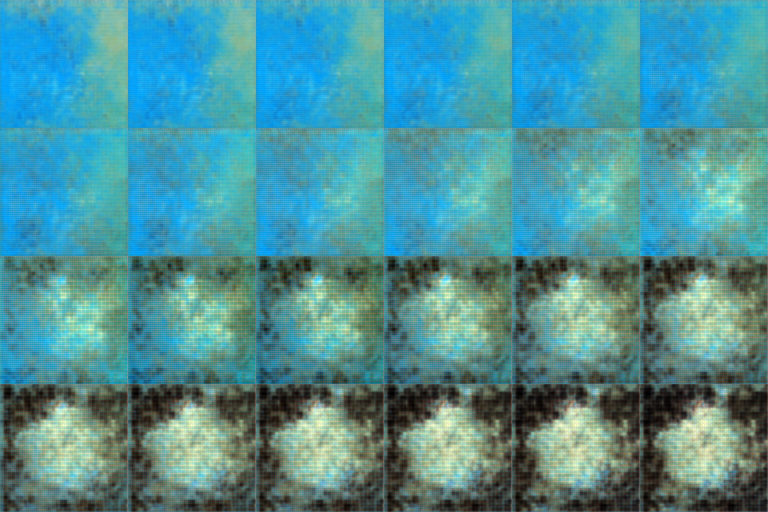

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 2)
# Interpolating points in latent space
interpolated = interpolate_points(pts[0], pts[1], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)

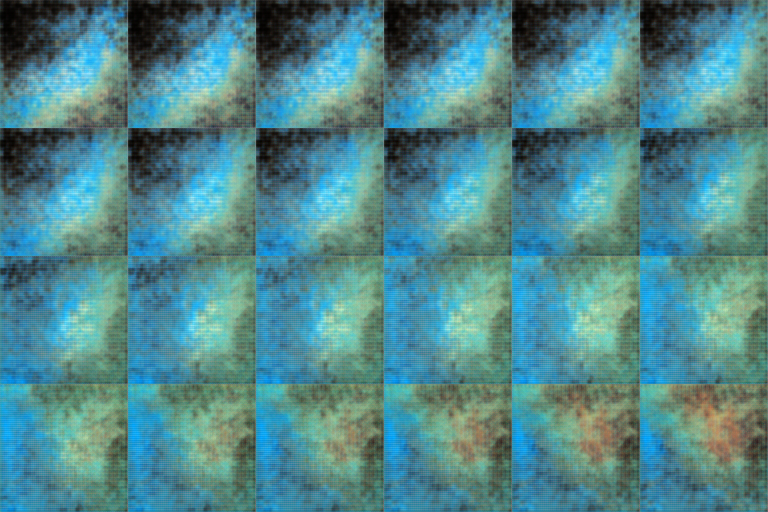

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 40)
# Interpolating points in latent space
interpolated = interpolate_points(pts[5], pts[20], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)

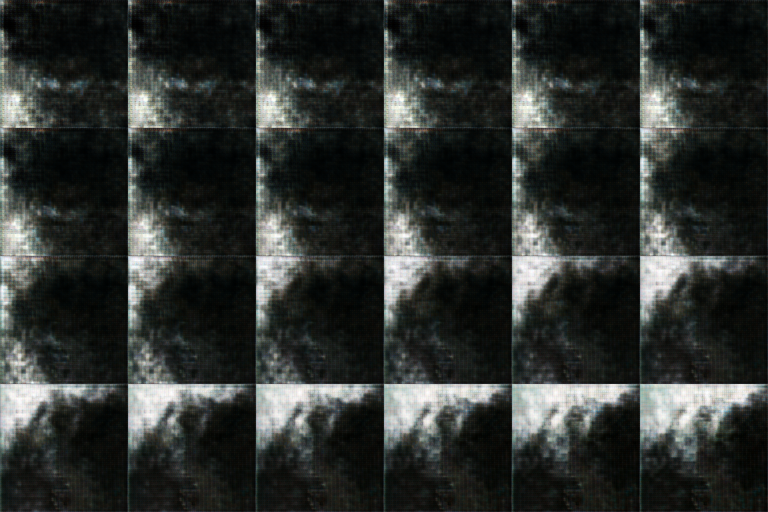

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 2)
# Interpolating points in latent space
interpolated = interpolate_points(pts[0], pts[1], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)

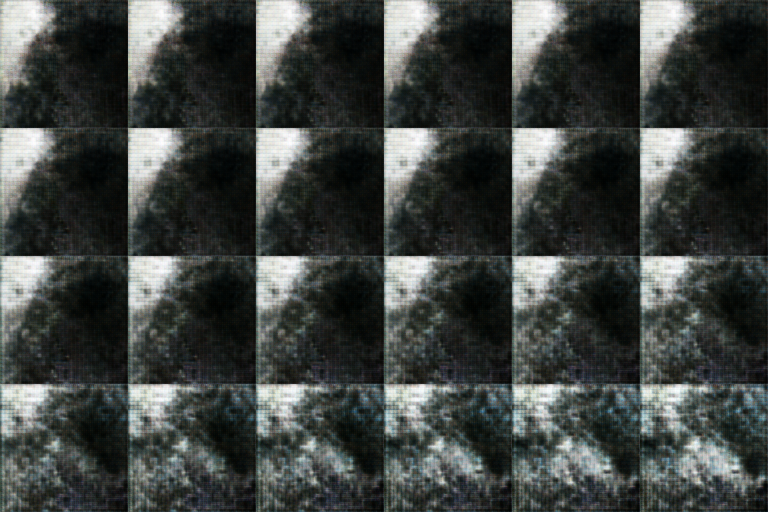

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 40)
# Interpolating points in latent space
interpolated = interpolate_points(pts[5], pts[20], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)

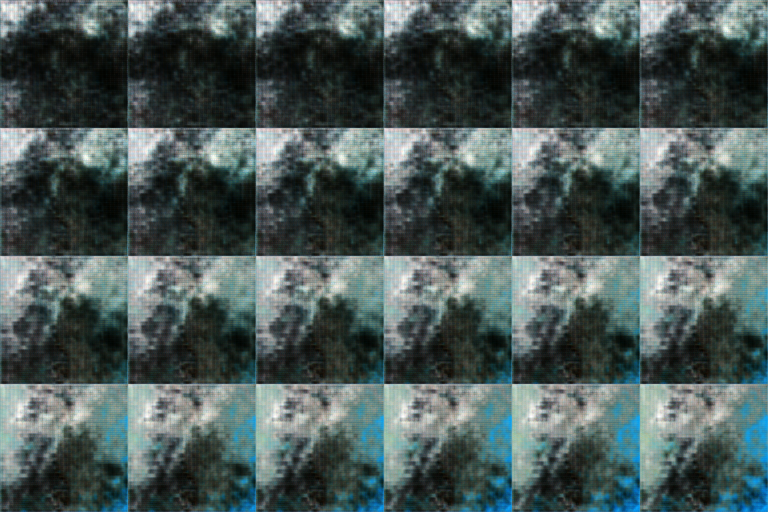

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 61)
# Interpolating points in latent space
interpolated = interpolate_points(pts[15], pts[50], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)

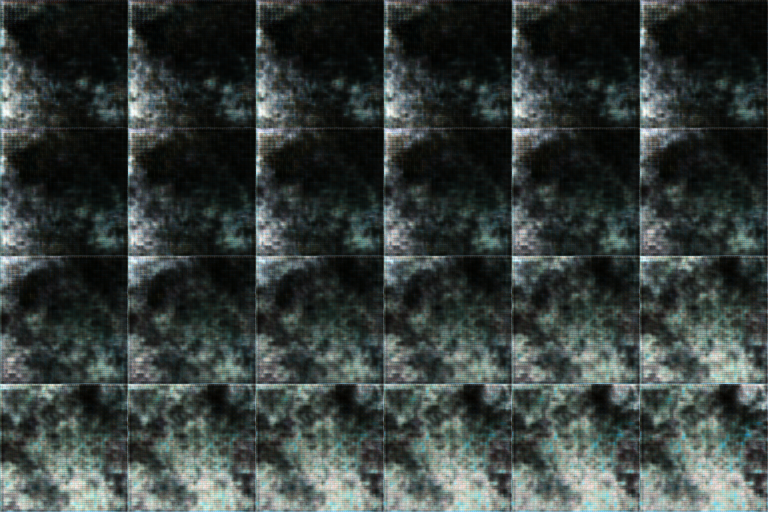

<Figure size 720x720 with 0 Axes>

In [ ]:
# How many images to generate?
num_images = 24

# Generating points in latent space
pts = generate_latent_points(latent_dim, 61)
# Interpolating points in latent space
interpolated = interpolate_points(pts[31], pts[32], num_images)
# Generating images
X = vae.decoder(interpolated)
X *= 255
X.numpy()
generated_images = []
for i in range(num_images):
    generated_images.append(keras.preprocessing.image.array_to_img(X[i]))
plt.figure(figsize=(10,10))

# Image display
image_grid(generated_images, 4, 6)